
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This is a collection of records of over 100 thousand medical appointments in Brazil. These were collected to better predict whether patients show up for their appointments or not. Each entry has some information about the patient:

- PatientId:        The unique identifier for each patient
- AppointmentID:    The ID for scheduled appointment
- Gender:           Gender of the patient
- ScheduledDay:     This tells us on what day the patient booked their appointment.
- AppointmentDay:   The day of the appointment
- Age:              The age of the patient
- Neighbourhood:    This is the location of the hospital.
- Scholarship:      Whether the patient is enrolled in Brasilian welfare program or not 
- Hipertension:     Whether the patient is hypertensive or not
- Diabetes:         Diabetes status
- Alcoholism:       Is the patient an alcoholic or not
- Handcap:          Does the patient have any disability
- SMS_received:     Was the patient advised on the appointment
- No-show:          Whether the patient showed up for the appointment or not


### Question(s) for Analysis

1. What is the probability that a patient will not show up for an appointment?
2. What factors are most important in predicting if a patient will show up for an appointment?
3. Do younger people honor medical appointments more than the elders?
4. Do medical conditions impair the ability of patients to show up for an appointment, if yes, which ones?



<a id='wrangling'></a>
## Data Wrangling

> Inspect the dataset and make modifications where necessary


### General Properties


#### Import modules and customize features

In [1]:
# import relevant modules

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.2f}'.format

#### File Management

- Inspect the working directory
- Change working directory to the folder where our data of interest is located
- Rename the file to avoid issues when reading into a dataframe
- Confirm the name change was successful
- Return to home directory

In [2]:
    ls

Archive/                        Database_TMDb_movie_data/
Database_Ncis_and_Census_data/  Investigate_a_Dataset.ipynb
Database_No_show_appointments/  noshowappointments-kagglev2-may-2016-Copy1.csv
Database_Soccer/


In [3]:
    cd Database_No_show_appointments

/home/workspace/Database_No_show_appointments


In [4]:
cp noshowappointments-kagglev2-may-2016.csv datafile.csv

In [5]:
ls

datafile.csv  noshowappointments-kagglev2-may-2016.csv


In [6]:
cd ..

/home/workspace


#### Load Data and Quick Glance

In [7]:
no_show_df = pd.read_csv(r'./Database_No_show_appointments/datafile.csv')
no_show_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,"29,872,499,824,296.00",5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,"558,997,776,694,438.00",5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,"4,262,962,299,951.00",5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,"867,951,213,174.00",5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,"8,841,186,448,183.00",5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Quick Overview of the Data

In [8]:
no_show_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




- There are 110,527 entries and 14 columns (features)
- No missing values
- Some columns are not properly formated



#### Statistical Summary

In [9]:
no_show_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,"110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00","110,527.00"
mean,"147,496,265,710,394.06","5,675,305.12",37.09,0.10,0.20,0.07,0.03,0.02,0.32
std,"256,094,920,291,739.09","71,295.75",23.11,0.30,0.40,0.26,0.17,0.16,0.47
min,"39,217.84","5,030,230.00",-1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"4,172,614,444,192.00","5,640,285.50",18.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"31,731,838,713,978.00","5,680,573.00",37.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"94,391,720,898,175.00","5,725,523.50",55.00,0.00,0.00,0.00,0.00,0.00,1.00
max,"999,981,631,772,427.00","5,790,484.00",115.00,1.00,1.00,1.00,1.00,4.00,1.00




#### Check for Duplicates


In [10]:
no_show_df.duplicated().sum()

0


#### Check Datatypes


In [11]:
types_dict = pd.Series(np.array([type(no_show_df[c][0]) for c in list(no_show_df)]))
types_dict.index = np.array(no_show_df.columns)
types_dict

PatientId         <class 'numpy.float64'>
AppointmentID       <class 'numpy.int64'>
Gender                      <class 'str'>
ScheduledDay                <class 'str'>
AppointmentDay              <class 'str'>
Age                 <class 'numpy.int64'>
Neighbourhood               <class 'str'>
Scholarship         <class 'numpy.int64'>
Hipertension        <class 'numpy.int64'>
Diabetes            <class 'numpy.int64'>
Alcoholism          <class 'numpy.int64'>
Handcap             <class 'numpy.int64'>
SMS_received        <class 'numpy.int64'>
No-show                     <class 'str'>
dtype: object


#### Check that ages are normal

In [12]:
no_show_df.query(f'(Age <= 0) | (Age >= 100)')['Age'].unique()

array([  0, 102, 115, 100,  -1])


#### Inspect No-show column

In [13]:
no_show_df['No-show'].unique()

array(['No', 'Yes'], dtype=object)


### Data Cleaning
Make necessary modifications to improve the quality of our data.

#### Convert PatientId from Float to Int

In [14]:
no_show_df['PatientId'] = no_show_df['PatientId'].astype(int)

#### Convert string to datetime for the ScheduledDay and AppointmentDay columns

In [15]:
def string_to_date(dataframe,columnName):
    return dataframe[columnName].apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))

no_show_df['ScheduledDay'] = string_to_date(no_show_df,'ScheduledDay')
no_show_df['AppointmentDay'] = string_to_date(no_show_df,'AppointmentDay')

#### Rename columns Hipertension, and Handcap

In [16]:
no_show_df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)

#### Drop ages that are below zero and above 100

In [17]:
no_show_df = no_show_df.query(f'(Age >= 0) & (Age <= 100)')

> Ages below zero are invalid and those above hundred are rear exceptions


#### Represent Dependent Variable No-show values as 0 and 1

In [18]:
no_show_df['No-show'].replace("No", 0,inplace=True)
no_show_df['No-show'].replace("Yes", 1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1
#### What is the probability that a patient will not show up for an appointment?

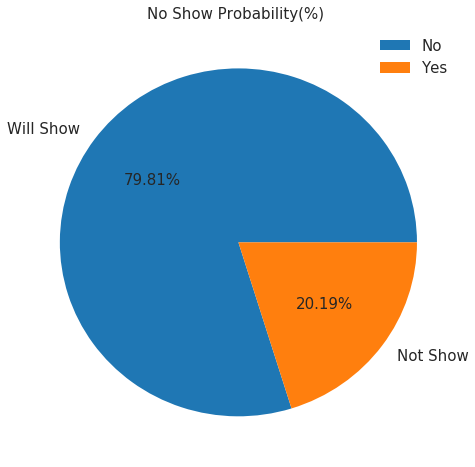

In [19]:
def autopct(pct): # only show the label when it's > 10%
    return (f"{'%.2f' % pct}{'%'}")

my_labels = np.array(['No','Yes'])

ax = no_show_df["No-show"].value_counts().plot(kind='pie', figsize=(8,8), autopct=autopct, labels=['Will Show','Not Show'], fontsize = 15)
ax.axes.get_yaxis().set_visible(False)
ax.set_title(f"No Show Probability(%) ", fontsize = 15)
plt.legend(loc='upper right', labels=my_labels, fontsize = 15);

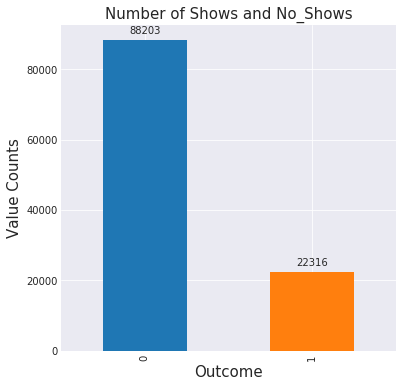

In [20]:
def plot_bar(plt_data,xlab,ylab,title=''):
    axn = plt_data.plot(kind='bar', figsize=(6,6))
    for p in axn.patches:
        axn.annotate(np.round(p.get_height(),decimals=4),
                    (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center',va='center',xytext=(0, 10),textcoords='offset points')
        axn.set_xlabel(xlab, fontsize = 15)
        axn.set_ylabel(ylab, fontsize = 15)
        plt.title(title, fontsize = 15)
    return axn


ax = plot_bar(no_show_df["No-show"].value_counts(),'Outcome','Value Counts','Number of Shows and No_Shows')
plt.show();

On average, a high percent of  patients will show up for their appointment

### Research Question 2
#### What factors are most important in predicting if a patient will show up for an appointment?

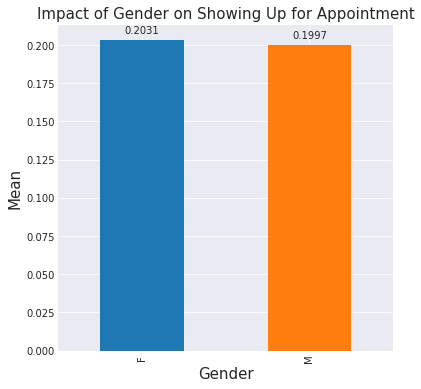

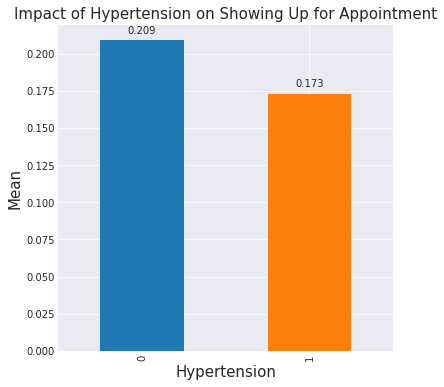

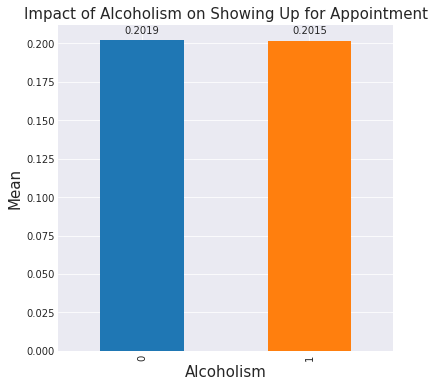

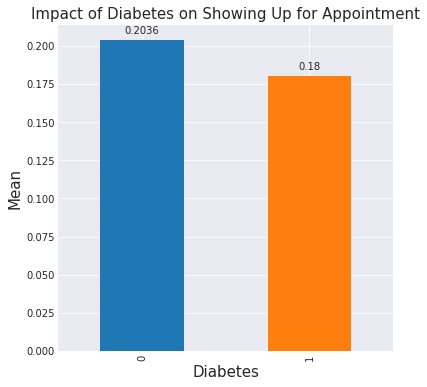

In [21]:
Exploratory_Analysis = ['Gender','Hypertension','Alcoholism','Diabetes']
for r in Exploratory_Analysis :
    plt_data = no_show_df.groupby(r)['No-show'].mean()
    title = f'Impact of {r} on Showing Up for Appointment'
    plot_bar(plt_data,r,'Mean',title)
    plt.show();

##### From the plots, we can see that gender and alcoholism do not really determine if a person shows up to an appointment or not, as both males and females, alcoholics and non-alcoholice do not show up to approximately 20 percent of their appointments. 

##### Hypertension seems to have a small affect, as a patient who has hypertension is 3% more likely to show up than a patient who doesn't have hyper tension. Diabetes seems to have a small effect too although this is smaller than that of hypertension.

### Research Question 3
#### Do younger people honor medical appointments more than the elders?

In [22]:
# Bin edges that will be used to "cut" the data into groups by age
bin_edges = np.array(no_show_df['Age'].describe()[3:].values) 
print(bin_edges)

# Labels for the four age groups
bin_names = ['Child', 'Adult', 'Middle_Age', 'Senior'] 

# Creates acidity_levels column
no_show_df['AgeGroup'] = pd.cut(no_show_df['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
no_show_df.head()

[   0.   18.   37.   55.  100.]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,AgeGroup
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Senior
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Senior
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Senior
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Child
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Senior


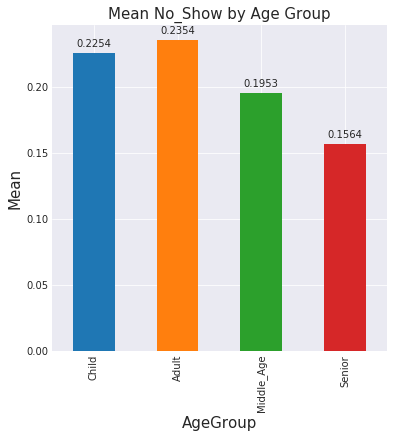

In [23]:
# Find the mean no_show of each age group with groupby
plt_data = no_show_df.groupby('AgeGroup')['No-show'].mean()
ax = plot_bar(plt_data,'AgeGroup','Mean','Mean No_Show by Age Group')
plt.show();

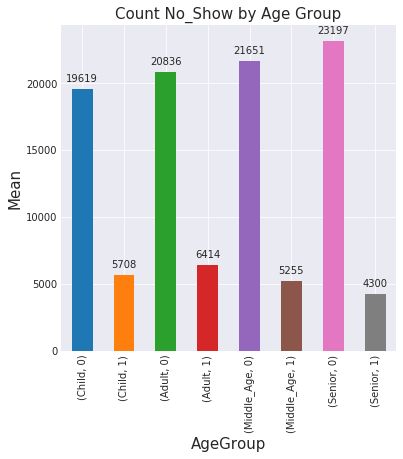

In [24]:
# Find the count no_show of each age group with groupby
plt_data = no_show_df.groupby('AgeGroup')['No-show'].value_counts()
ax = plot_bar(plt_data,'AgeGroup','Mean','Count No_Show by Age Group')
plt.show();

In [25]:
no_show_df.groupby('AgeGroup')['No-show'].value_counts()['Senior']

No-show
0    23197
1     4300
Name: No-show, dtype: int64

In [26]:
no_show_df.groupby('AgeGroup')['No-show'].sum()

AgeGroup
Child         5708
Adult         6414
Middle_Age    5255
Senior        4300
Name: No-show, dtype: int64

In [27]:
# Find the proportion of no_show of each age group with groupby

# Count of No_Show by Age Group
ChildCount = no_show_df.groupby('AgeGroup')['No-show'].count()['Child']
AdultCount = no_show_df.groupby('AgeGroup')['No-show'].count()['Adult']
middleAgeCount = no_show_df.groupby('AgeGroup')['No-show'].count()['Middle_Age']
seniorCount = no_show_df.groupby('AgeGroup')['No-show'].count()['Senior']
print(ChildCount, AdultCount, middleAgeCount, seniorCount)

prop_ChildCount = no_show_df.groupby('AgeGroup')['No-show'].sum()['Child']/ChildCount
prop_AdultCount = no_show_df.groupby('AgeGroup')['No-show'].sum()['Adult']/AdultCount
prop_middleAgeCount = no_show_df.groupby('AgeGroup')['No-show'].sum()['Child']/middleAgeCount
prop_seniorCount = no_show_df.groupby('AgeGroup')['No-show'].sum()['Adult']/seniorCount
print(prop_ChildCount, prop_AdultCount, prop_middleAgeCount, prop_seniorCount)


25327 27250 26906 27497
0.225372132507 0.235376146789 0.212145989742 0.233261810379


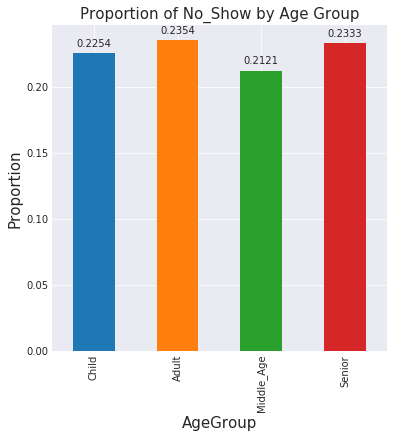

In [28]:
prop_dict = pd.Series(np.array((prop_ChildCount, prop_AdultCount, prop_middleAgeCount, prop_seniorCount)))
prop_dict.index = bin_names

ax = plot_bar(prop_dict,'AgeGroup','Proportion','Proportion of No_Show by Age Group')
plt.show();

##### We can see from this plot that Middle Age Adults are more likely to come for an appointment as they have the lowest rate of not showing up.

### Research Question 4
#### Do medical conditions impair the ability of patients to show up for an appointment, if yes, which ones?

The Handicap column has 5 categories that were not explained in the summary of the dataset.

We will convert them to categorical variables in order to analyze the impact of each category on showing up for appointments.

In [29]:
no_show_df.Handicap.unique()

array([0, 1, 2, 3, 4])

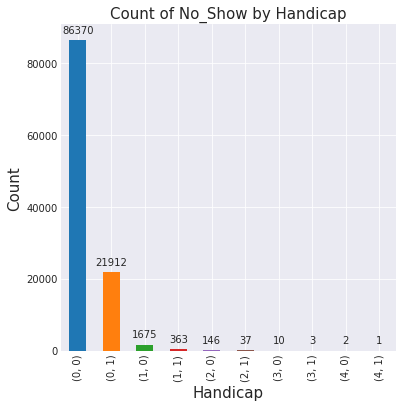

In [30]:
plt_data = no_show_df.groupby('Handicap')['No-show'].value_counts()
ax = plot_bar(plt_data,'Handicap','Count','Count of No_Show by Handicap')
plt.show();

In [31]:
# Find the proportion of no_show of each handicap type with groupby

# Append "Handicap" to the handicap types
no_show_df['Handicap'] = no_show_df['Handicap'].apply(lambda x: f'Handicap_{x}')

In [32]:
# Count of No_Show by Handicap type

Handicap_0Count = no_show_df.groupby('Handicap')['No-show'].count()['Handicap_0']
Handicap_1Count = no_show_df.groupby('Handicap')['No-show'].count()['Handicap_1']
Handicap_2Count = no_show_df.groupby('Handicap')['No-show'].count()['Handicap_2']
Handicap_3Count = no_show_df.groupby('Handicap')['No-show'].count()['Handicap_3']
Handicap_4Count = no_show_df.groupby('Handicap')['No-show'].count()['Handicap_4']
print(Handicap_0Count, Handicap_1Count, Handicap_2Count, Handicap_3Count, Handicap_4Count)

# Proportions of each Handicap
prop_Handicap_0Count = no_show_df.groupby('Handicap')['No-show'].sum()['Handicap_0']/Handicap_0Count
prop_Handicap_1Count = no_show_df.groupby('Handicap')['No-show'].sum()['Handicap_1']/Handicap_1Count
prop_Handicap_2Count = no_show_df.groupby('Handicap')['No-show'].sum()['Handicap_2']/Handicap_2Count
prop_Handicap_3Count = no_show_df.groupby('Handicap')['No-show'].sum()['Handicap_3']/Handicap_3Count
prop_Handicap_4Count = no_show_df.groupby('Handicap')['No-show'].sum()['Handicap_4']/Handicap_4Count
print(prop_Handicap_0Count, prop_Handicap_1Count, prop_Handicap_2Count, prop_Handicap_3Count,prop_Handicap_4Count)


108282 2038 183 13 3
0.202360503131 0.178115799804 0.20218579235 0.230769230769 0.333333333333


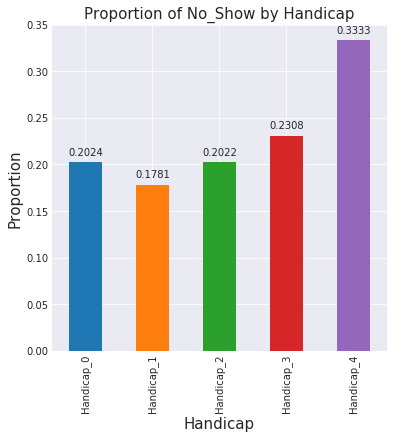

In [33]:
prop_dict = pd.Series(np.array((prop_Handicap_0Count, prop_Handicap_1Count, prop_Handicap_2Count, prop_Handicap_3Count, prop_Handicap_4Count)))
prop_dict.index = ['Handicap_0','Handicap_1','Handicap_2','Handicap_3','Handicap_4']

ax = plot_bar(prop_dict,'Handicap','Proportion','Proportion of No_Show by Handicap')
plt.show();



##### A patient who is handicap_4 is 13 % more likely to not show up to an appointment than a person who is not handicap_4.




## Limitations

### Gaps in Analysis
- No machine learning involved to test and validate the impact of features on showing up
- Attendance history of each patient was not analyzed.
- The number of days between scheduled day and appointment day can be an important factor that impacts showing up rate. This was not analyzed here.

<a id='conclusions'></a>
## Conclusions

### These are my findings from the analysis of the data provided:


1. 80% of patients are likely to show up for a medical appointment.

2. Gender and alcoholism do not really determine if a person shows up to an appointment or not. Hypertension seems to have some affect, as a patient who has hypertension is 3% more likely to show up than a patient who doesn't have hyper tension. Diabetes seems to have a small effect too although this is smaller than that of hypertension.

3. Middle aged adults (37yrs - 54yrs) are least likely to miss an appointment while adults (18yrs - 36yrs) are most likely to miss an appointment.

4. A patient who is handicap_4 is 13 % more likely to not show up to an appointment than a person who is not handicap_4.



## Submitting your Project 

### Done

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0